Тест (критерий) Граббса

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
from scipy import stats

In [2]:
group1 = [77.90862701, 77.87894303, 77.98950278, 77.77332218, 77.44379058, 78, 76, 45, 10000]
group2 = [57.2, 68.6, 104.4, 95.1, 89.9, 70.8, 83.5, 60.1, 75.7, 102.0, 69.0, 79.6, 68.9, 98.6, 76.0, 74.8, 56.0, 55.6, 69.4, 59.5]

In [3]:
def grubbs_stat(y):
    std_dev = np.std(y)
    avg_y = np.mean(y)
    abs_val_minus_avg = abs(y - avg_y)
    max_of_deviations = max(abs_val_minus_avg)
    max_ind = np.argmax(abs_val_minus_avg)
    Gcal = max_of_deviations / std_dev
    print(f"Grubbs Statistics Value: {Gcal}")
    return Gcal, max_ind

def calculate_critical_value(size, alpha):
    t_dist = stats.t.ppf(1 - alpha / (2 * size), size - 2)
    numerator = (size - 1) * np.sqrt(np.square(t_dist))
    denominator = np.sqrt(size) * np.sqrt(size - 2 + np.square(t_dist))
    critical_value = numerator / denominator
    print(f"Grubbs Critical Value: {critical_value}")
    return critical_value

def check_G_values(Gs, Gc, inp, max_index):
    if Gs > Gc:
        print(f"{inp[max_index]} is an outlier")
    else:
        print(f"{inp[max_index]} is not an outlier")

In [5]:
Gcritical = calculate_critical_value(len(group1), 0.05)
Gstat, max_index = grubbs_stat(group1)
check_G_values(Gstat, Gcritical, group1, max_index)

Grubbs Critical Value: 2.215004223325564
Grubbs Statistics Value: 2.828412087233517
10000 is an outlier


In [ ]:
quant25 = np.quantile(group1, 0.25)
quant75 = np.quantile(group1, 0.75)
quant_scope = quant75 - quant25

for i in group1:
  if i<(quant25-1.5*quant_scope) or i>(quant75+1.5*quant_scope):
    print("Выброс:", i)
  else:
    print('Выбросов нет')
    continue

Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выброс: 77.44379058


<Axes: >

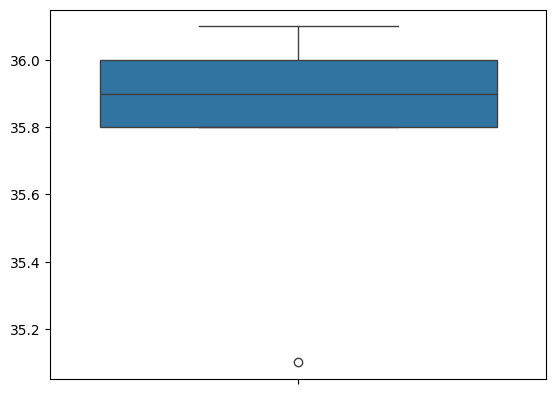

In [ ]:
sns.boxplot(group1)